# NLP

* NLP(Natural Language Processing)    自然语言处理
* NLU(Natural Language Understanding) 自然语言理解
* NLG(Natural Language Generation)    自然语言生成

文本清洗，分词，纠正，特征工程，命名实体识别，分类

应用场景：

- 机器翻译
- 垃圾邮件
- 情感分析
- 自动文摘
- 自动问答
- 信息抽取
- 中文分词
    - 基于词典 -> 正向，逆向，双向
    - 基于机器学习
- 文本分类
    - TF-IDF与相互贝叶斯
    - TextCNN
    - FastText
- 诗歌生成

框架：
- Theano: 过去尝试学习开发与研究的行业标准，随着创始人之一的Ian Goodfellow转去谷歌开发Tensorflow而没落
- MXNet: 亚马逊李沐带队开发的深度学习框架，强大，前期文档较差，不适合新手入门。
- Keras: 基于别的尝试学习框架，做了统一的API接口
- Caffe2: Facebook人工智能与应用机器学习团队，贾扬清。工业与学术界仍然在使用
- Pythorch: python优先，文档，社区都很友好
- TensorFlow: Google的强力推动及谷歌产品里大量应用

# KNN

样本数据集合，每个数据有标签（答案）。将新数据的每个特征与样本集里的数据对应的特征进行比较，提取最近似的特征的数据**对应的标签**，
通常选择前k个最相似数据（通常小于20），然后选择k个最相似数据中出现次数最多的分类作为推理结果。

![img/knn1.png](img/knn1.png)

上图中，
- 如果选最近的3个（k=3），那么显然红三角最多
- 如果k=5，那么显然蓝方框最多
- 所以最好k为奇数，这样不至于有刚好相等的情况
- 可以为不同的距离赋予不同的权重

## SKlearn

Scikit learn => sklean，包含：
- classification: 分类
- regression: 回归
- clustering: 聚类（非监督分类）
- dimensionality reduction: 数据降维
- model selection: 模型选择
- preprocessing: 数据与处理

### Sklearn-knn

上例的分类可以用sklean的k近邻方法（knn）来实现：`sklearn.neighbors.KNeighborsClassifier`
![img/knn2.png](img/knn2.png)


#### demo

In [1]:
root = '/Users/walker/ai_dataset'

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

"""
Sepal.Length（花萼长度）cm;
Sepal.Width（花萼宽度）cm;
Petal.Length（花瓣长度）cm;
Petal.Width（花瓣宽度）cm;
"""
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2003)
X_train.shape, y_test.shape

((112, 4), (38,))

**参数说明**
* n_neighbors: 默认5 (1, 21)
* weights: 默认`uniform`，根据距离赋予权重的为`distance`
* algorighm: 默认为`auto`
    - brute: 蛮力搜索，线性扫描，耗时
    - kd_tree: 二叉树，在比个数小于20时效率高
    - ball_tree: 以质心c和半径r分割样本空间，克服kd树高纬失效而发明
* metric: 默认为`minkowski`即p=2的欧氏距离。['euclidean', 'manhattan', 'minkowski']
* metric_params: None，与距离计算的其它参数
* n_jobs: 设为-1就好了，充分利用CPU

#### demo2

In [2]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier as KNN

group = np.array([[1,101], [5,89], [108,5], [115,8]])
labels = ["A", "B", "C", "D"]

knn = KNN(n_neighbors=3, algorithm='auto')  # network
knn.fit(group, labels)                      # train
result = knn.predict([[6, 20]])             # predict
result

array(['A'], dtype='<U1')

### 决策边界

拥有决策边界的模型称为线性模型，反之为非线性模型

## 交叉验证与算法优化

`Grid Search`穷举调参

### 特征缩放（归一化，Normalization)

- Min-max Normalization: $\frac{x - min(x)}{max(x) - min(x)}$, (0, 1)
- z-score Normalization: $\frac{x - mean(x)}{std(x)}$, (mean=0, std=1)

### 图片之间的“距离”是什么？

就是对应位置的像素的值的距离（曼哈顿距离 p=1范数）之和

![knn3.png](img/knn3.png)

#### 特征编码 (feature encoding)

**one-hot**

one-hot让不同的类别之间不具备直觉上的可比性，避免产生错误的回归结果，而事实上你要用0, 1, 2...也是可以的，一些教程里也直接就是这样来表示类别

### 数值离散化

像年龄，收入等**特征**，不需要连续地考量:
- 无收入，低收入，中等收入，高收入
- <10岁， 10-13岁，13-18岁...等

### dataset

In [98]:
import torch 
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader

batch_size = 100

train_dataset = datasets.MNIST(root,
                              train=True,
                              transform=transforms.ToTensor(),
                              download=True)
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = datasets.MNIST(root,
                              train=False,
                              transform=transforms.ToTensor(),
                              download=True)
# test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
train_dataset.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

### knn风格的数据加载

In [99]:
# 一直不知道原来可以直接用data, targets来取
X_train = train_dataset.data.numpy().reshape(-1, 28*28)
y_train = train_dataset.targets.numpy()
# np.eye(10)[y_train[:10],:]
X_test = test_dataset.data.numpy().reshape(-1, 28*28)
y_test = test_dataset.targets.numpy()
np.eye(10)[y_test[:10],:]  # one-hot

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [100]:
%time
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

CPU times: user 3 µs, sys: 8 µs, total: 11 µs
Wall time: 13.1 µs


0.9705

In [103]:
%time
# predict 
y_train_pred = knn.predict(X_train)
y_train_pred[:10]

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.05 µs


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])

### scikit learn的datasets

In [106]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, data_home=root)
mnist.__dir__(), mnist.keys() # 居然是同一个方法？

(dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url']),
 dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url']))

'3'

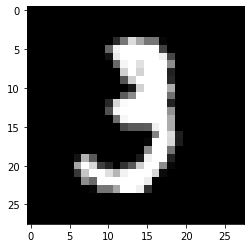

In [70]:
X, y = mnist['data'], mnist['target']
import matplotlib.pyplot as plt
plt.imshow(X[10].reshape(28, 28), cmap='gray')
y[10]

In [77]:
%time
# 手动分割训练集和验证集
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# 或者用上面介绍过的split方法
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=3)

# 再一次练习 network -> train -> score的过程
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9688

### save and load model

In [92]:
import joblib

filename = 'model.sav'
joblib.dump(knn, filename)

['model.sav']

In [115]:
# knn2 = joblib.load(filename)
# y_train_pred = knn2.predict(X_train)
# y_train_pred[:10]

In [ ]:
datasets.CIFAR10(root,
              train=True,
              transform=transforms.ToTensor(),
              download=True)

## 参数调优

In [88]:
%time
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
model = KNN()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors, weights=weights, metric=metric)
# 把数据集切成n_split份，每次把其中一份作为测试集
# 重复n_repeats次（等于随机设了三次测试集)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, \
                           n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X, y)  # 所以这里要传入整个样本
print(f'Best {grid_result.best_score_} using {grid_result.best_params_}')
params = grid_result.cv_results_['params']
params


Best 0.9755555555555556 using {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'uniform'}


[{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'},
 {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'},
 {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'},
 {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'},
 {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'},
 {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'},
 {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'},
 {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'},
 {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'},
 {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'},
 {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'},
 {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'},
 {'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'uniform'},
 {'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'distance'},
 {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'uniform'}

### 准确率(Accuracy)，召回率(recall), 精确率(precision)

准确率评判正确的预测在总体样本的比率，只要正样本分布越高，准确率自然就越高，没有任何意义。  
有意义的测评是不要漏过任何一个负样本，如果不能把负样本尽可能多地找出来，那么检测就没意义。  
以上说的是“检测缺陷场景”   
而在视常见识别领域，正样本比较少，负样本比较多。

一次预测，结果总是P(`positive`)和N(`negative`)，每个P和N都有预测正确和失败的可能，所以有如下指标：

混淆矩阵: 
$
\begin{array}{c|c}
& Positive & Negative \\
\hline
True & TP & TN \\
\hline
False & FP & FN
\end{array}
$
如果：
$
\begin{array}{c|c}
3 & 4 \\
\hline
1 & 2
\end{array}
$

混淆矩阵还有另一种写法，即横纵轴都以positive，和negative表示，而不是如上的一个是指标，一个是判断（正确，错误）。课程里用的是全p, n的写法，这些都不重要，自己看清楚不要臆测就好了。

解读：
- 预测Positive共4例，成功3，失败1
- 预测Negative共6例，成功4，失败2
所以反推正样本3+4=7，负样本1+2=3，共10例

大原则，我们看到的时候已经是结果，所以只能从结果反推真实情况，比如正确的`正`和错误的`负`，加起来就是样本的`正`，等等

- 准确率：7/10 （TP+TN/total) 根据上文的文字描述，其实就是判断成功的次数
- 精确率：3/4 (TP/TP+FP) 即只关注一个指标，比如正例，或负例，然后观察它错了多少。
    - 本例中，只预测了4个正，就错了一个
- 召回率：3/5 (TP/TP+FN) 仍然只关注一个指标，比如正例，但是召回率关心你把所有的“正例“找出来多少
    - 也就是说，如果你把所有的样本判断为正例，召回率可达100%
    
```python
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_train, y_train_pred, average='micor')  # [None, 'micro', 'macro', 'weighted']
recall_score(y_train, y_train_pred)
f1_score(y_train, y_train_pred)
```

![knn4.png](img/knn4.png)


```python
# 假设精度设为90:

from sklearn.metrics import precision_recall_curve
threshold_90_precision = thresholds[np.argmax(precisions>=0.90)]

# predict, load threshold by knn.predict_proba()
# y_pred = knn.predict(X_test)  # default threshold is 0.5
y_pred = (knn.predict_proba(X_test)[:,1] >= threshold_90_precision).astype(bool) # set threshold
```

In [124]:
from sklearn.metrics import precision_score, recall_score, f1_score
# average: [None, 'micro', 'macro', 'weighted']
print("precision score:", precision_score(y_train, y_train_pred, average='micro'))
print("recall score:\t", recall_score(y_train, y_train_pred, average='micro'))
print("f1 score:\t", f1_score(y_train, y_train_pred, average='micro'))

precision score: 0.9867166666666667
recall score:	 0.9867166666666667
f1 score:	 0.9867166666666667


### cifar10

In [2]:
from sklearn.datasets import fetch_openml

cifar10 = fetch_openml('CIFAR_10', data_home=root)
cifar10.__dir__()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
cifar10.data[:10]

array([[ 26.,  17.,  13., ...,  27.,  26.,  27.],
       [ 94., 101.,  95., ..., 182., 184., 155.],
       [183., 158., 166., ..., 250., 250., 250.],
       ...,
       [225., 214., 190., ..., 144., 167., 171.],
       [ 82.,  69.,  63., ...,  67.,  57.,  68.],
       [198., 173., 144., ...,  40.,  31.,  26.]])

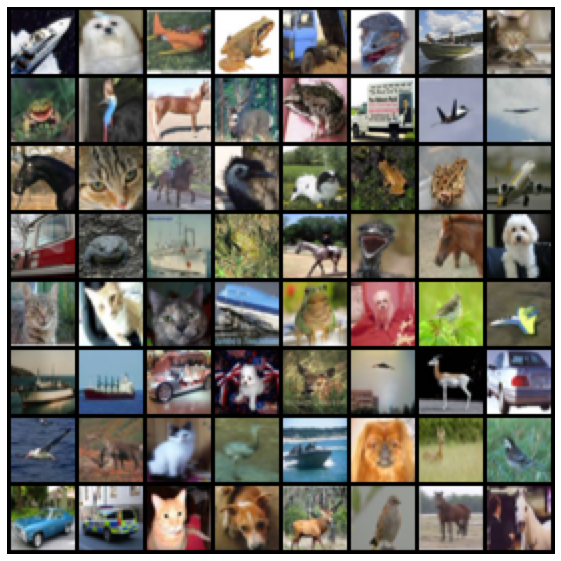

In [4]:
import torch
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np

# cifar10.data is pandas dataframe
# take a look
data = torch.tensor(cifar10.data[:64]).reshape(-1, 3, 32, 32)
# data = torch.tensor(cifar10.data.to_numpy()[:64]).reshape(-1, 3, 32, 32)
plt.axis('off')
plt.subplots_adjust(left=.1, right=2, bottom=.1, top=2)
plt.imshow(make_grid(data, nrow=8).permute(1, 2, 0).int())

In [7]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
import cv2

d = cifar10.data
# d = cifar10.data.to_numpy()
data = np.zeros((len(d), 32*32))
# grayscale
for i, image in enumerate(d):
    img = image.reshape(3, 32, 32).transpose(1, 2, 0).astype(np.uint8)
    data[i] = cv2.cvtColor(img[...,::-1], cv2.COLOR_BGR2GRAY).reshape(32*32)
# normalization
data = (data - data.mean()) / data.std()  

X_train, X_test, y_train, y_test = train_test_split(data, cifar10.target, train_size=0.8, random_state=7)


In [6]:
knn = KNN(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.2798333333333333

In [183]:
# proba = knn.predict_proba(X_test)

# from sklearn.metrics import precision_recall_curve
# threshold_90_precision = thresholds[np.argmax(precisions>=0.90)]

# # predict, load threshold by knn.predict_proba()
# # y_pred = knn.predict(X_test)  # default threshold is 0.5
# y_pred = (knn.predict_proba(X_test)[:,1] >= threshold_90_precision).astype(bool) # set threshold

array([[0.33333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.33333333, 0.66666667,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [188]:
y_train_pred.shape, y_train.shape

((60000,), (48000,))

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
model = KNN()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors, weights=weights, metric=metric)
# 把数据集切成n_split份，每次把其中一份作为测试集
# 重复n_repeats次（等于随机设了三次测试集)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, \
                           n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(data, cifar10.target)  # 所以这里要传入整个样本
print(f'Best {grid_result.best_score_} using {grid_result.best_params_}')
params = grid_result.cv_results_['params']
params

In [190]:
knn = KNN(n_neighbors=15, metric='euclidean', weights='uniform')
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.29583333333333334